In [2]:
import numpy as np
import random
import os
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from model.DDPM import DDPM
from model.con_DDPM import con_DDPM

In [3]:
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50

unconditional ddpm

c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

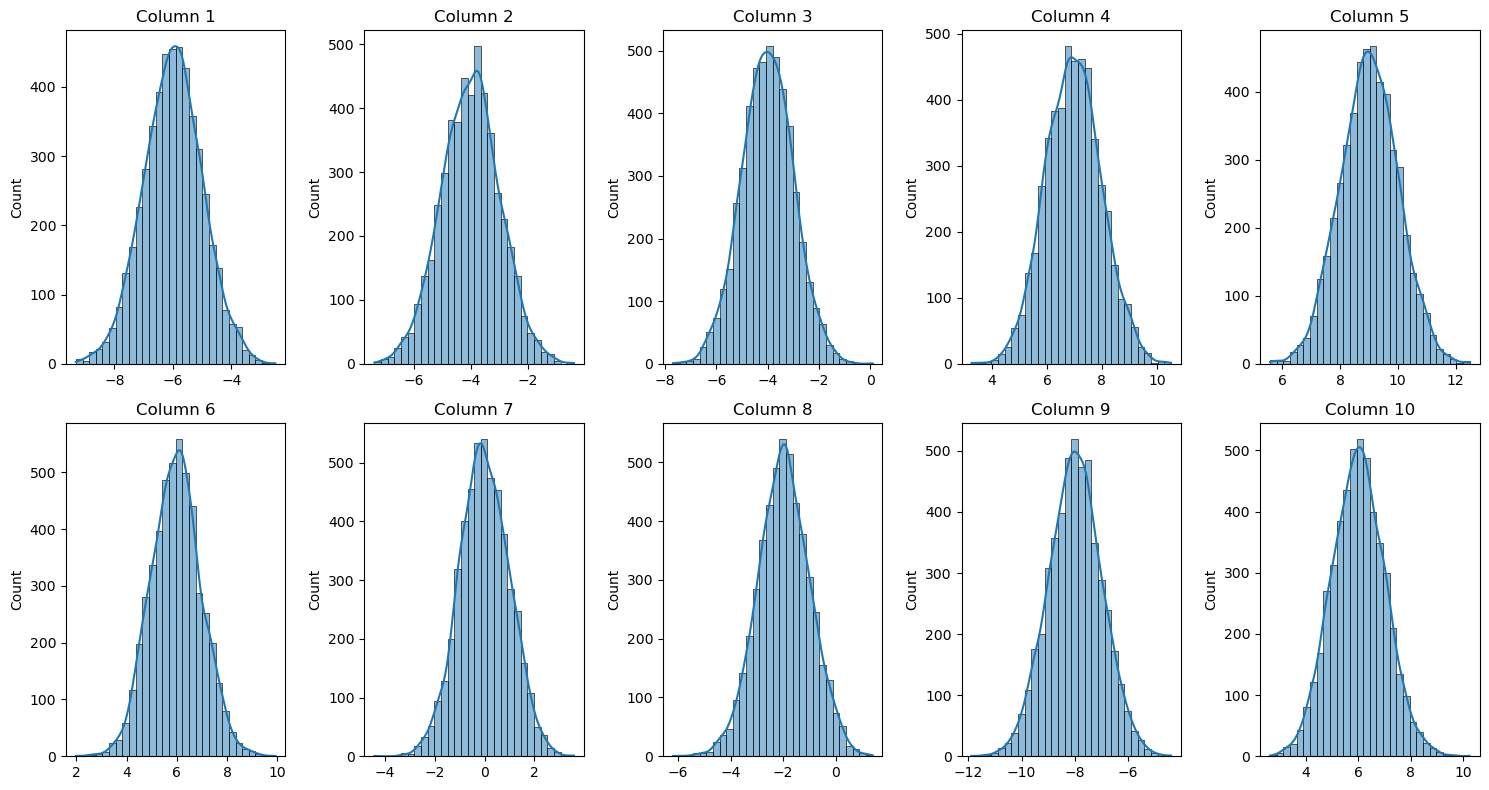

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_size = 5000
np.random.seed(64)
# Generate a random integer array 'a' with shape (10, 1)
a = np.random.randint(-10, 10, size=(10, 1))

# Flatten 'a' to create the mean vector for the multivariate normal distribution
mean = a.flatten()

# Generate multivariate normal data 'b' with shape (1000, 10)
b = np.random.multivariate_normal(mean=mean, cov=np.eye(10), size=data_size)

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the 2x5 axes array for easy iteration
axes = axes.flatten()

# Loop through each column of 'b' and plot its histogram on the corresponding subplot
for i in range(10):
    sns.histplot(b[:, i], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Column {i+1}')  # Set the title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
only_final = True
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_5 = np.array(b[:3000,:], dtype=np.float32)
X_val_5 = np.array(b[3000:4000,:], dtype=np.float32)
X_test_5 = np.array(b[4000:5000,:], dtype=np.float32)
sc = StandardScaler()
sca_X_train_5 = sc.fit_transform(X_train_5)
sca_X_val_5 = sc.fit_transform(X_val_5)
sca_X_test_5 = sc.fit_transform(X_test_5)
sca_traindata_loader_5 = DataLoader(sca_X_train_5, batch_size=batch_size, shuffle=True)
sca_valdata_loader_5 = DataLoader(sca_X_val_5, batch_size=batch_size, shuffle=True)
sca_test_loader_5 = DataLoader(sca_X_test_5, batch_size=batch_size, shuffle=True)


input_dim = X_test_5.shape[1]
ddpm =DDPM(device, beta_1, beta_T, T,input_dim)
ddpm.train(10,1,sca_traindata_loader_5,sca_valdata_loader_5,10)

epoch: 0, Train Loss: 1.0187, Val Loss: 0.9975
epoch: 0, find new best loss: Train Loss: 0.9975
----------
epoch: 2, find new best loss: Train Loss: 0.9925
----------
epoch: 3, find new best loss: Train Loss: 0.9900
----------
epoch: 4, find new best loss: Train Loss: 0.9604
----------
epoch: 5, find new best loss: Train Loss: 0.9601
----------
epoch: 6, find new best loss: Train Loss: 0.9555
----------
epoch: 7, find new best loss: Train Loss: 0.9063
----------


In [6]:
ddpm.train(10,1,sca_traindata_loader_5,sca_valdata_loader_5,10)

epoch: 0, Train Loss: 0.9234, Val Loss: 0.9151
epoch: 0, find new best loss: Train Loss: 0.9151
----------
epoch: 1, find new best loss: Train Loss: 0.8846
----------
epoch: 7, find new best loss: Train Loss: 0.8788
----------


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

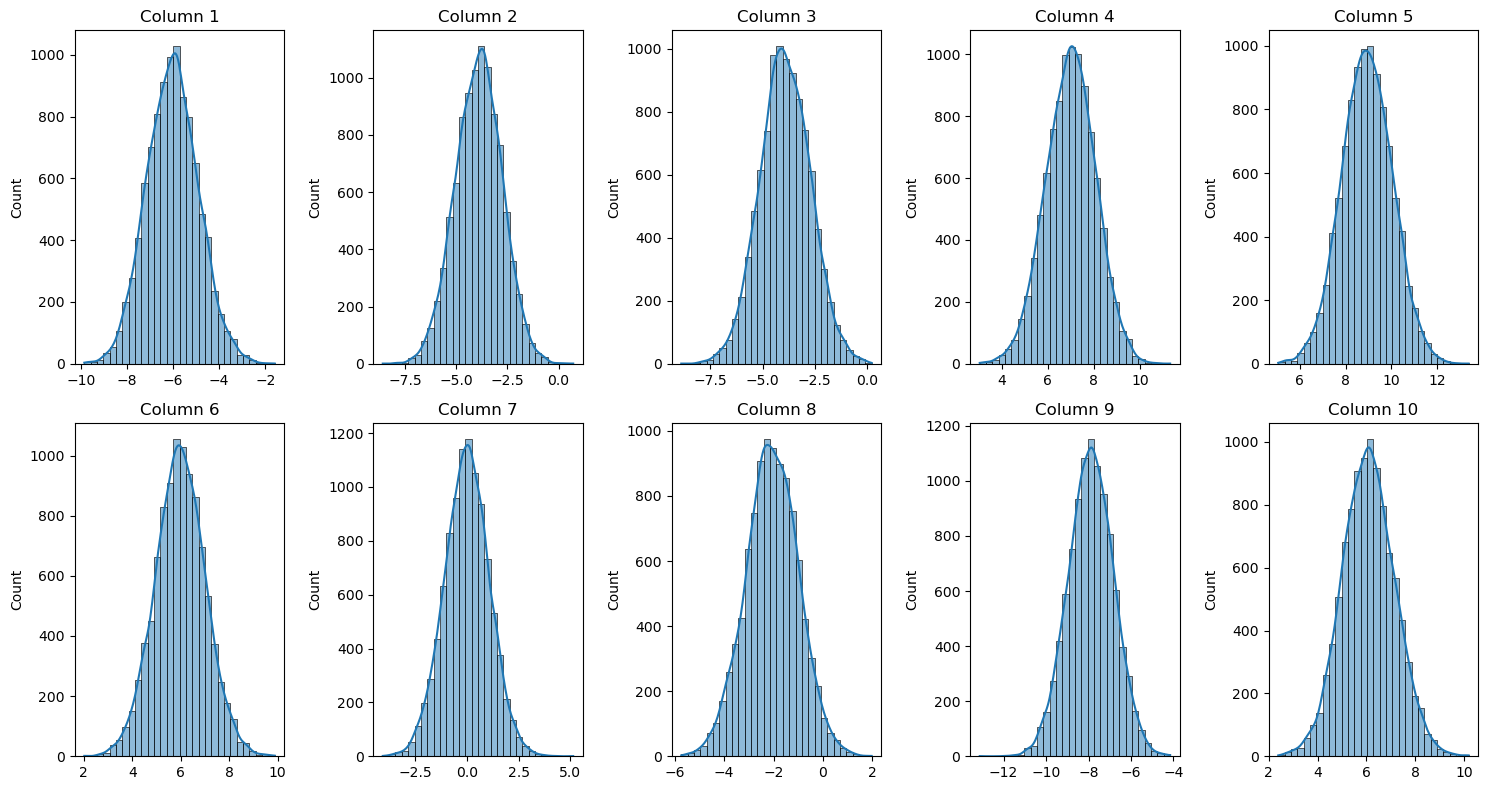

In [7]:
sampling_number = 10000
only_final = True
sample = ddpm.sampling(sampling_number, only_final)
sample =sc.inverse_transform(sample.cpu().detach().numpy())
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i in range(10):
    sns.histplot(sample[:, i], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Column {i+1}') 


plt.tight_layout()

# Show the plot
plt.show()

In [8]:
sampling_number = 10000
sample = ddpm.sampling(sampling_number,only_final=only_final,ifreturnrand=True)


print("noise shape:",sample[1].shape)
np.save('randnoise_uncon.npy',sample[1].cpu().detach().numpy())

noise shape: torch.Size([50, 10000, 10])


conditional ddpm

c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

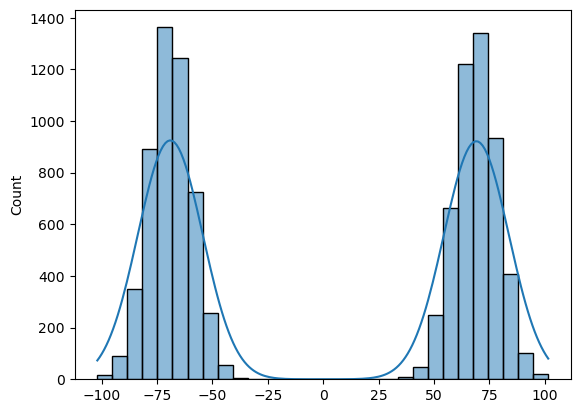

In [9]:
import numpy as np
import torch

# 生成双峰分布数据
data3 = np.random.multivariate_normal([3, 9], [[1, 0.5], [0.5, 1]], 10000)
coef1 = [5, 6]
coef2 = [-5, -6]
noise = np.random.randn(10000)

# 生成双峰目标变量
data4_1 = data3[:, 0] * coef1[0] + data3[:, 1] * coef1[1] + noise
data4_2 = data3[:, 0] * coef2[0] + data3[:, 1] * coef2[1] + noise
data4 = np.concatenate([data4_1[:5000], data4_2[5000:]])

# 合并数据
data = np.concatenate([data3, data4.reshape(-1, 1)], axis=1)
dataset = torch.tensor(data).float()
sns.histplot(data[:,-1], kde=True, bins=30)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_5, X_temp_5 = train_test_split(data, test_size=0.4, random_state=42)
X_val_5, X_test_5 = train_test_split(X_temp_5, test_size=0.5, random_state=42)

X_train_5 = pd.DataFrame(X_train_5)
X_test_5 = pd.DataFrame(X_test_5)
X_val_5 = pd.DataFrame(X_val_5)
condim = X_train_5.shape[1]-1
train_data = X_train_5
val_data = X_val_5
test_data = X_test_5
X_train_5 = np.array(train_data, dtype=np.float32)
X_val_5 = np.array(val_data, dtype=np.float32)
X_test_5 = np.array(test_data, dtype=np.float32)
resultdata = pd.DataFrame()
# 设置 'Weekly_Sales' 列的值为 vaedata 中的 'Weekly_Sales' 列的值
resultdata['test'] = X_test_5[:,-1]
scatrain5 = StandardScaler()
sca_X_train_5 = scatrain5.fit_transform(X_train_5)
scaval5 = StandardScaler()
sca_X_val_5 = scaval5.fit_transform(X_val_5)
scay5 = StandardScaler()
sca_Y_train_5 = scay5.fit_transform(X_train_5[:,-1].reshape(-1,1))
scatest5 = StandardScaler()
sca_X_test_5 = scatest5.fit_transform(X_test_5)
sca_traindata_loader_5 = DataLoader(sca_X_train_5, batch_size=64, shuffle=True)
sca_valdata_loader_5 = DataLoader(sca_X_val_5, batch_size=64, shuffle=True)
scatter_range = [-10, 10]
total_iteration = 1000
current_iteration = 0
display_iteration = 200
sampling_number = 1000
only_final = True
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ddpm  =con_DDPM(device, beta_1, beta_T, T, 1,condim)
ddpm.train(10,1,sca_traindata_loader_5,sca_valdata_loader_5,10)




epoch: 0, Train Loss: 0.9705, Val Loss: 0.8997
epoch: 0, find new best loss: Train Loss: 0.8997
----------
epoch: 1, find new best loss: Train Loss: 0.8965
----------
epoch: 2, find new best loss: Train Loss: 0.7873
----------
epoch: 3, find new best loss: Train Loss: 0.7264
----------
epoch: 4, find new best loss: Train Loss: 0.5919
----------
epoch: 5, find new best loss: Train Loss: 0.5329
----------
epoch: 6, find new best loss: Train Loss: 0.4825
----------
epoch: 7, find new best loss: Train Loss: 0.4571
----------
epoch: 8, find new best loss: Train Loss: 0.4499
----------
epoch: 9, find new best loss: Train Loss: 0.3765
----------


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


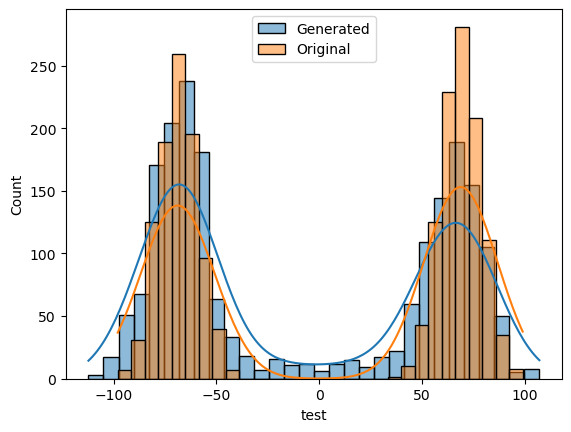

In [11]:
sampling_number = sca_X_test_5.shape[0]
only_final = True
sample = ddpm.sampling(sampling_number,torch.Tensor(sca_X_test_5[:,:-1]).cuda(),True)
trandatacvae = scay5.inverse_transform(sample.cpu().detach().numpy())

sns.histplot(trandatacvae, kde=True, bins=30, label='Generated')
sns.histplot(resultdata['test'], kde=True, bins=30, label='Original')
plt.legend()  # 添加图例

noise shape: torch.Size([50, 2000, 1])


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


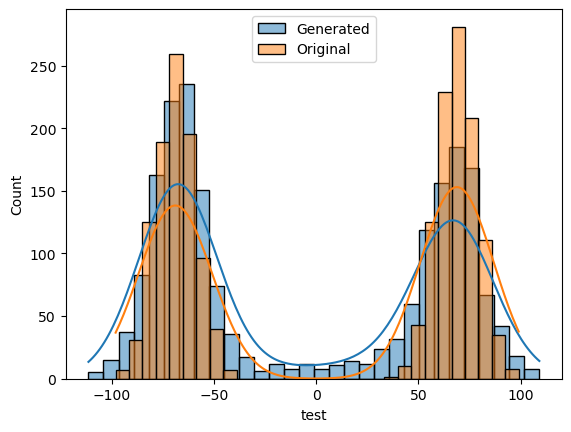

In [12]:
sampling_number = sca_X_test_5.shape[0]
only_final = True
sample = ddpm.sampling(sampling_number,torch.Tensor(sca_X_test_5[:,:-1]).cuda(),only_final=only_final,ifreturnrand=True)
trandatacvae = scay5.inverse_transform(sample[0].cpu().detach().numpy())

sns.histplot(trandatacvae, kde=True, bins=30, label='Generated')
sns.histplot(resultdata['test'], kde=True, bins=30, label='Original')
plt.legend()  # 添加图例

print("noise shape:",sample[1].shape)
np.save('randnoise_con.npy',sample[1].cpu().detach().numpy())